# Analysis of Titanic Passengers Dataset using Numpy and Pandas



### Stage 1 : Importing Dataset and pandas, numpy

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanicdata = pd.read_csv("titanic-data.csv")

### Stage 2 : Data Cleaning

From the first look of data set, some of the rows have missing age and Cabin data. Also, data like PassengerId,Ticket and Cabin is not useful for our analysis. Even the names are not useful. We are more interested to find out which factors helped the survival of some passengers. Hence, let us first clean our data set by removing the above mentioned columns and missing rows.

In [41]:
# Removing PassengerID, Cabin and Ticket Columns
titanic_data = titanicdata.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [42]:
titanic_data_remove_na = titanic_data.dropna()

### Stage 3 : Data Exploration

Above, I have created two data frames. First frame contains NAN values and second does not contain any rows with NAN values.

Let us explore some values from data. Let us start asking basic questions and then move to tough ones.

#### Question 1: How many people survived? Percentage ?

Let us answer this question by converting 'Survived' column to Numpy Array

In [43]:
survived = np.array(titanic_data['Survived'])
no_people_survived = np.count_nonzero(survived)
print no_people_survived

percent_survived = (np.mean(survived)*100)
print percent_survived

342
38.3838383838


#### Question 2: How many people were from first class, second class and third class?


(array([ 216.,  184.,  491.]),
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 3 Patch objects>)

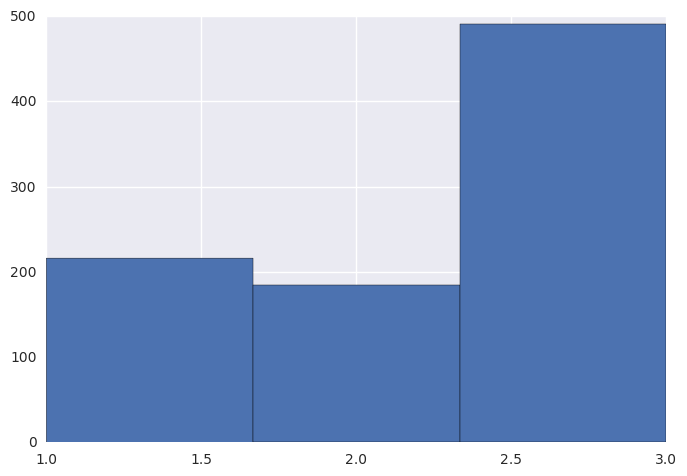

In [44]:
plt.hist(titanic_data['Pclass'],bins=3)

From above histogram, we can see that Class 1 had 216, Class 2 had 184 and Class 3 had 491 passengers

#### Question 3: How many males and females were onboard?

Using Pandas groupby() function to get number of males and females

In [52]:
titanic_data.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

#### Question 4: What is average age? 

For this question, we need to remove all rows which do not have age information. After removing those rows, let us find the average age.

29.6420926966


(array([  54.,   46.,  177.,  169.,  117.,   70.,   45.,   23.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

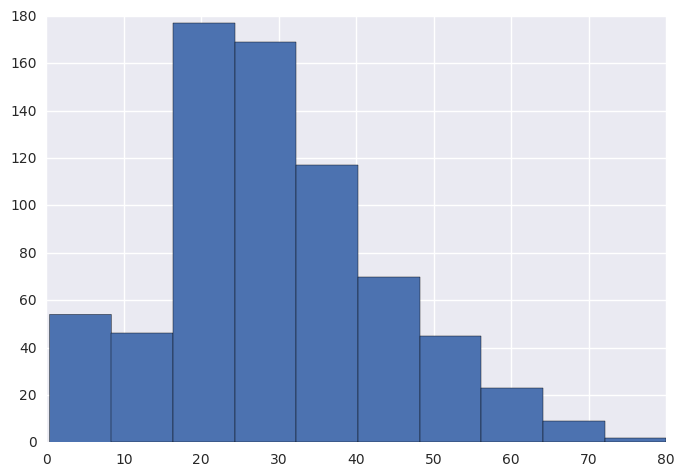

In [58]:
print titanic_data_remove_na['Age'].mean()
plt.hist(titanic_data_remove_na['Age'],bins=10)


#### Question 5: What is average fare of each class?

For this problem, we need to group by passenger class and then calculate average fare over each class

In [74]:
titanic_data.groupby('Pclass').mean()['Fare']

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

#### Question 6: How many people embarked from S/C/Q? 

In [75]:
titanic_data.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

#### Question 7: How many people were travelling alone? (without siblings/spouse/parents/children)

In [77]:
titanic_data.groupby(['SibSp','Parch']).size()

SibSp  Parch
0      0        537
       1         38
       2         29
       3          1
       4          1
       5          2
1      0        123
       1         57
       2         19
       3          3
       4          3
       5          3
       6          1
2      0         16
       1          7
       2          4
       3          1
3      0          2
       1          7
       2          7
4      1          9
       2          9
5      2          5
8      2          7
dtype: int64

This shows that 537 people were travelling alone.